## Linear Regression [Supervised learning]

### What is Regression
"Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (y) and independent variable (X)"<br>

### Regression Use
Three major uses for regression analysis are<br>

<b>• Determining the strength of predictors: </b>Regression might be used to identify the strength of effect independant variable on dependant variable. Example: Relationship strength between marketing and sales. or relationship between age and income<br>

<b>• Forecasting an effect:</b> How much a dependant variable changes when there is a change in independant variables.<br>

<b>• Trend forecasting</b> regression is used to make point estimates. example: price of bitcoin in next 6 months.<br>

### Types of Regression
<b>1. Linear Regression : </b> We are interested in y=mX+c. We want to find corelation between X and y.<br>
<b>2. Logistic Regression : </b>Here we are mapping y versus X in a sigmoid function. here we find y is true or false/ 1 or 0/ binomial  decision based on given value of X.<br>

| Linear Regression | Logistic Regression |
| --- | --- |
| Maps Continuous X to continuous y | Maps to Continuous X to Categorical or binary y |
| The data is modelled using a straight line | The probability of some obtained event is represented as a linear function of a combination of predictor variables |
| Used with Continuous Variable | Used with Categorical Variable |
| Output: Value of the variable | Output:Probability of occurrence of event |
| Accuracy/fit: measured by loss, R squared, Adjusted R squared etc. | Accuracy/fit: Accuracy, Precision, Recall, F1 score, ROC curve, Confusion Matrix, etc |

### Linear Regression Selection Criteria
<b>1. Classification and Regression Capabilities : </b>Because of the model is a straight line. its hard to fit a new data set when it come to building a classification problem. Hence not good for classification<br>
<b>2. Data Quality : </b>Each missing value removes a data point that could have optimized the model. Or if you remove the outlier your model become very good<br>
<b>3. Computational Complexity : </b> its not expensive when compared to decision tree or clustering algo. complexity O(X^2) or O(Xn)<br>
<b>4. Comprehensible and Transparent : </b>Linear regression is representated by simple mathamatical notation.<br>

### Where Linear Regression Used

<b>Evaluating Trends and sales Estimate</b><br>
<b>Analyzing the impact of price changes</b><br>
<b>Assesment of risk in financial servvice and insurance domain</b><br>

### Checking goodness of fit using R squared Method
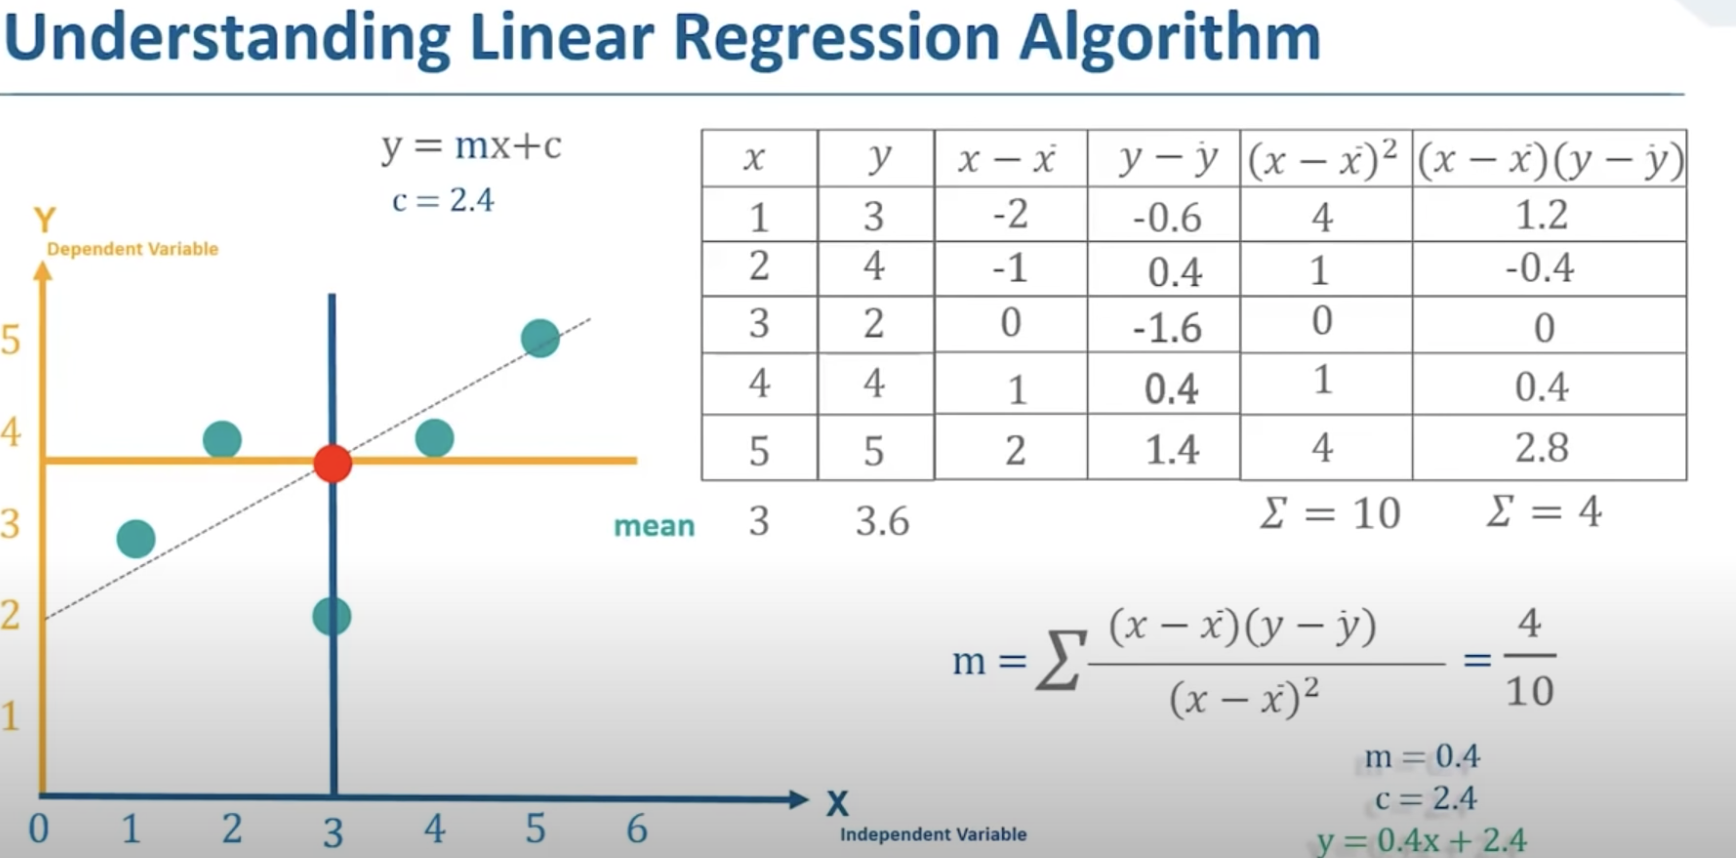


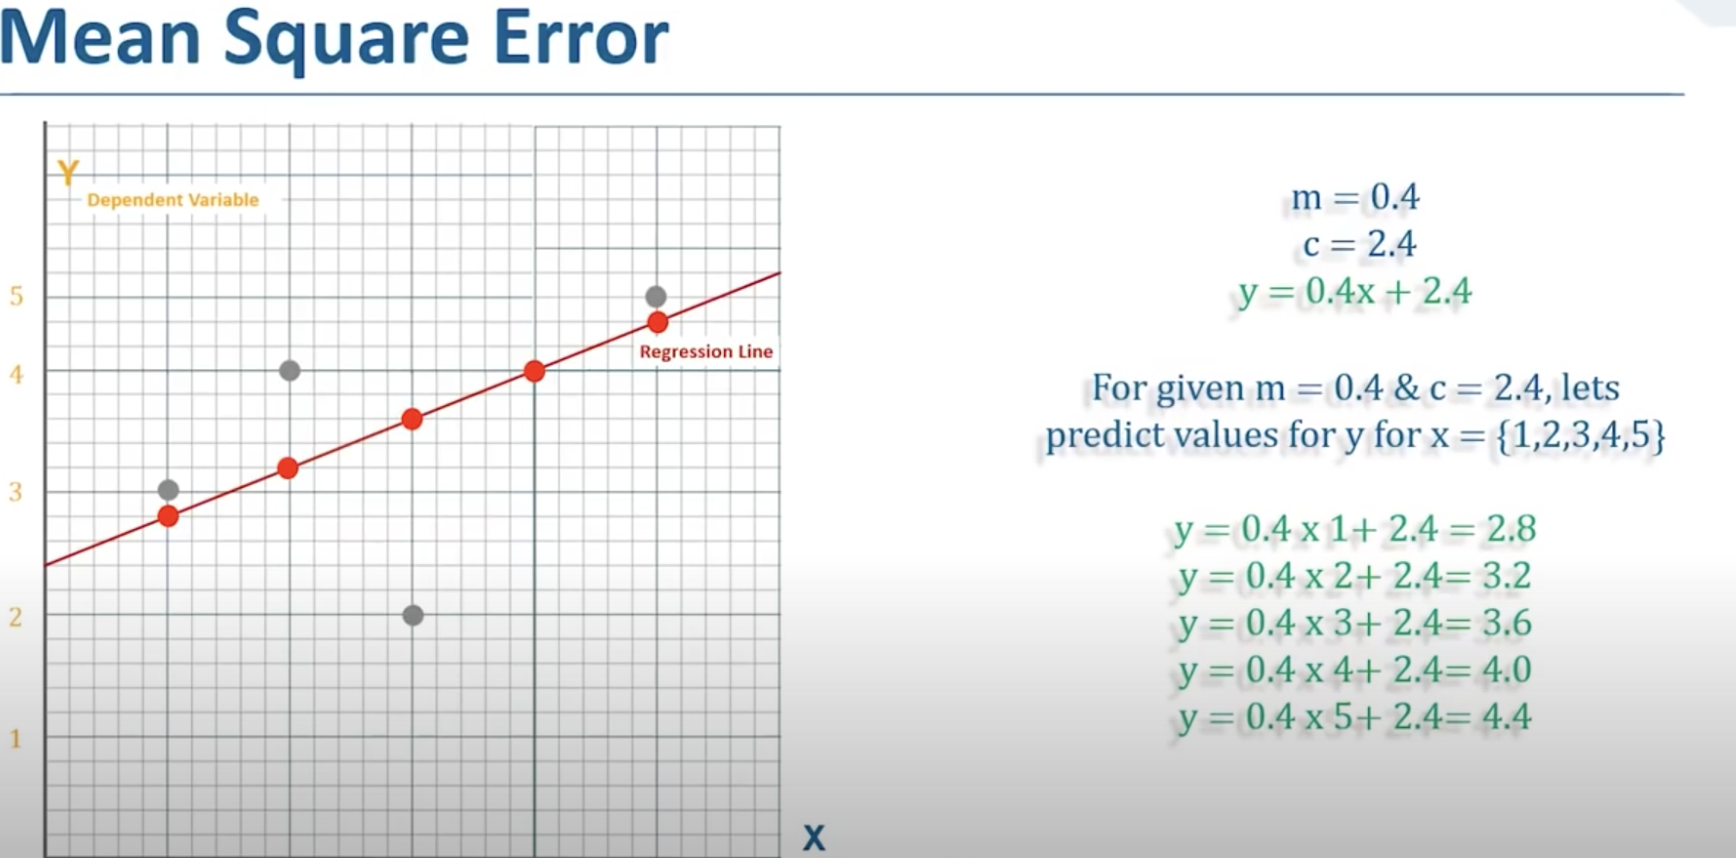


• R-squared value is a statistical measure of how close the data are to the fitted regression line<br>
• It is also known as coefficient of determination, or the coefficient of multiple determination<br>
• If R^2 value is close to 1 the line is bet fit. but if it close to 0 then it is not a best fit have outliers in data.<br>

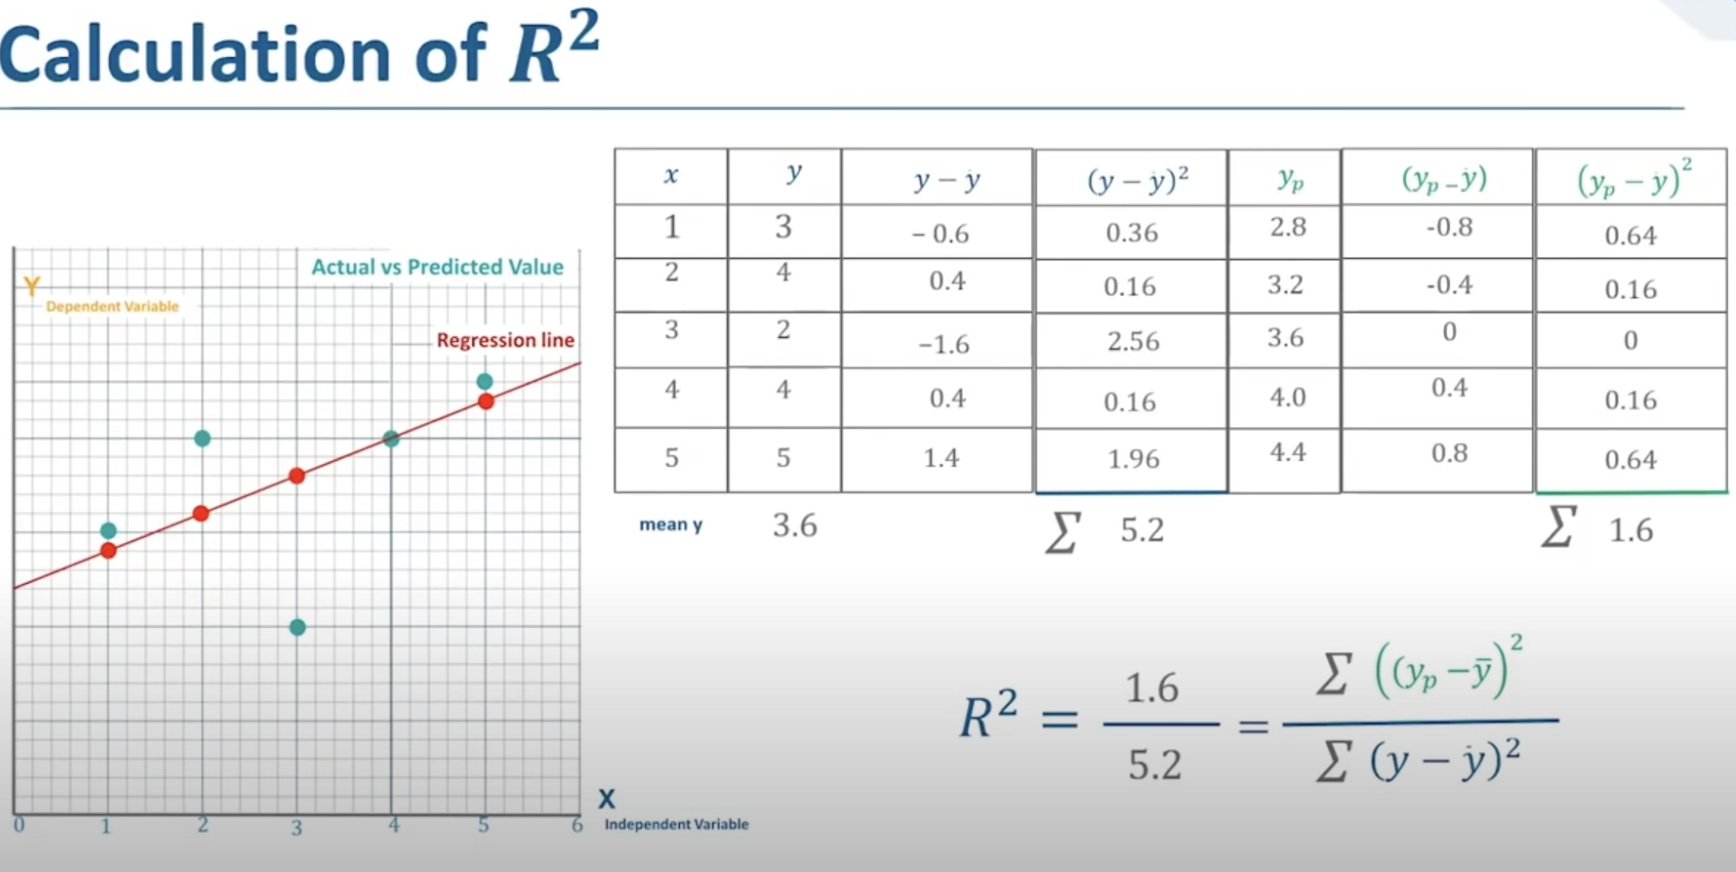
### Implementation of Linear Regression Algorithm

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0,10.0)

#reading data
data = pd.read_csv('./headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [3]:
#mean X and y
mean_X = np.mean(X)
mean_y = np.mean(y)

# tot number of values
n=len(X)

# Using the formula to calculate b1 and be
numer = 0
denom = 0
for i in range (n):
    numer += (X[i] - mean_X) * (y[i] - mean_y)
    denom += (X[i] - mean_X) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_X)
# Print coefficients
print (b1, b0)

0.26342933948939945 325.57342104944223


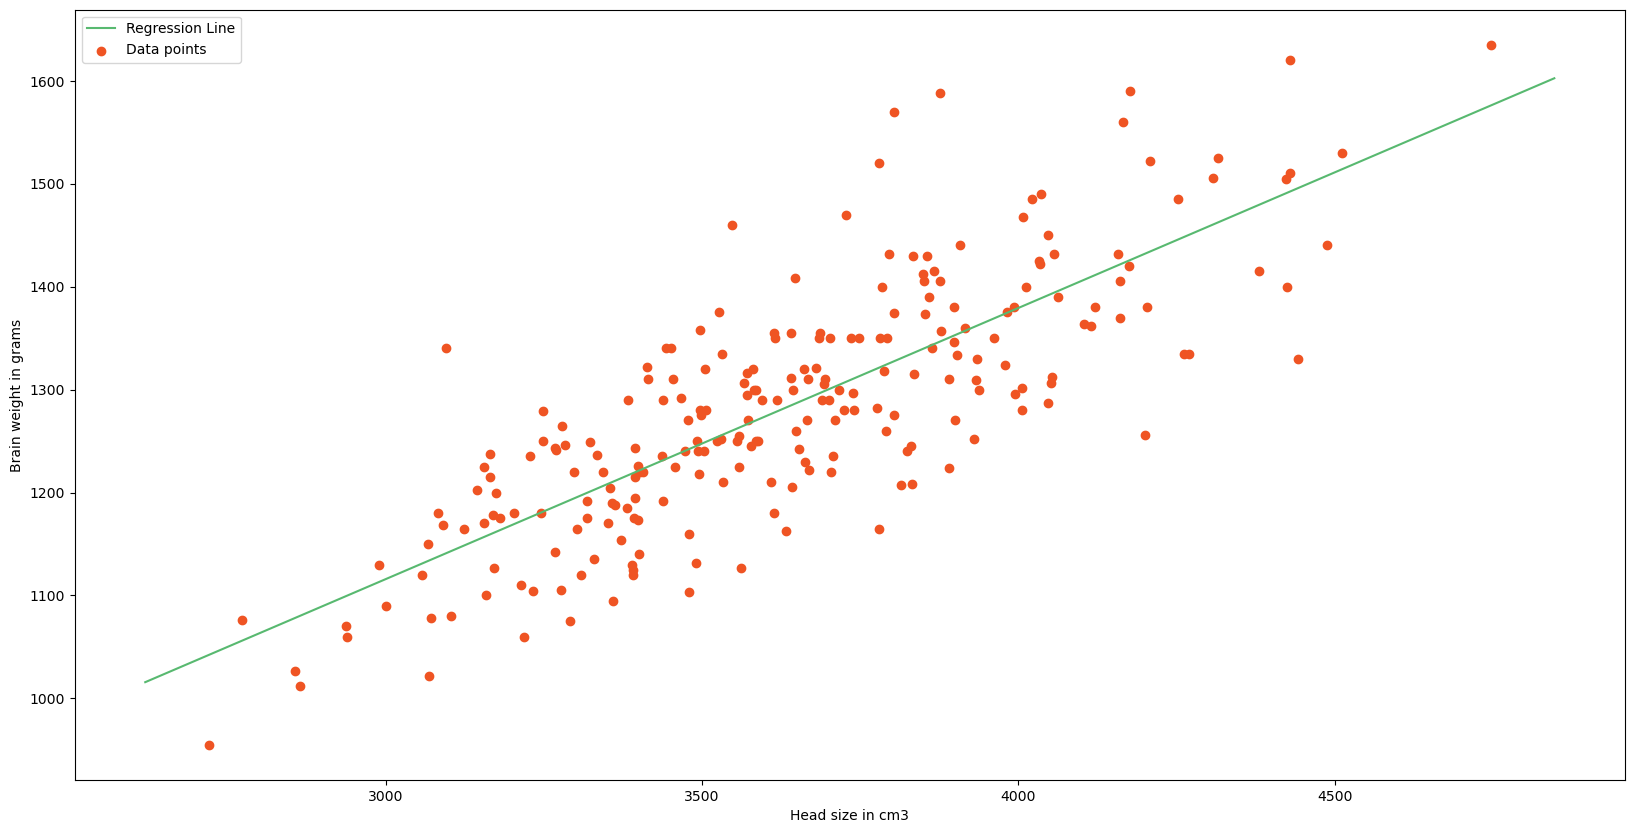

In [4]:
# Plotting Values and Regression Line
max_x = np. max(X) + 100
min_x = np.min(X) - 100
# Calculating Line values × and y
xx = np.linspace(min_x, max_x, 1000)
yy = b0 + b1 * xx
# Ploting Line
plt.plot(xx, yy, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter (X, y, c='#ef5423', label='Data points') 
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [5]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred = b0+b1*X[i]
    ss_t += (y[i]-mean_y)**2 
    ss_r += (y[i]-y_pred)**2 
r2 = 1-abs(ss_r/ss_t)
print(r2)


0.6393117199570003


### Implementation of Linear Regression using ML

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))

# Creating Model
reg = LinearRegression ()

# Fitting training data
reg = reg.fit (X, y)
# Y Prediction
y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, y)
print(rmse)
print(r2_score)

72.1206213783709
0.639311719957
